# Phase 2 Noun Space

The motivation for this notebook can be found in the updates of the [readme](readme.md):

> Based on the output of the verb experiments in this phase, I see that it is not possible to simply build a space for only verbs or only nouns. Rather, these two spaces really need each other if there is any hope to obtain more defined word clusters. A fine example of the problem can be seen in the [phase2_clustering](http://nbviewer.jupyter.org/github/codykingham/semantics/blob/master/phase2_clustering.ipynb) notebook, where the noun יהוה and אלהים occur disproportionately as the subject with verbs like אנף "be angry," מטר "cause rain," and others. In reality, יהוה and אלהים both possess attributes which are common to other nouns, such as the collocability with action verbs. But because the space does not see these similarities, the lexemes are treated as completely separate entities. This is where the noun space can enter in and offer observations about the similarity of nouns with each other. By adding similar words to the space, based on a pre-calculated noun space, it is hoped that the knowledge gap can be bridged and lexemes with similar attributes considered together. This will allow, for instance, the noun אלהים, which also takes verbs like אמר, to be identified with other nouns that take the verb אמר.

The purpose of this notebook is to develop the noun space that will be used to enhance the verb space. A previous set of noun spaces were created in [phase 1](phase1/readme.md) of this project. In this notebook, we use the updated Experiment and Semantic classes which have much more flexibility to define target word and basis elements. One major difference between the old data gathering technique and this one is that coordinate nouns are counted using the coordinate relation (BHSA: `rel` = `par` or "parallel") instead of counting all nouns that are coordinated in a chain. This Experiment class can also easily record words contained within related subphrases, such as construct or appositional relations.

The enhanced classes allow much more informative data to be imported into the space (which will also require longer processing times). In the interest of building as useful a space as possible, proper nouns *will* be included in these spaces. This will allow proper nouns like יהוה to be compared with other nouns like אלהים. I will experiment with various parameters before deciding an a final experiment class to use for the verb space enhancement.

### Load Data

In [2]:
import numpy as np
import pandas as pd
import collections, os, sys, pickle
import matplotlib.pyplot as plt
from tf.fabric import Fabric
from tf.extra.bhsa import Bhsa
from project_code.noun_experiments import NounExperiment1
from project_code.semspace import SemSpace

bhsa_data_paths=['~/github/etcbc/bhsa/tf/c',
                 '~/github/semantics/project_code/lingo/heads/tf/c']
TF = Fabric(bhsa_data_paths)
tf_api = TF.load('''
                function lex vs language
                pdp freq_lex gloss domain ls
                heads prep_obj mother rela
                typ sp st
              ''', silent=True)

tf_api.makeAvailableIn(globals())
B = Bhsa(api=tf_api, name='phase2_initial_experiments', version='c')

This is Text-Fabric 3.4.10
Api reference : https://github.com/Dans-labs/text-fabric/wiki/Api
Tutorial      : https://github.com/Dans-labs/text-fabric/blob/master/docs/tutorial.ipynb
Example data  : https://github.com/Dans-labs/text-fabric-data

116 features found and 0 ignored


**Documentation:** <a target="_blank" href="https://etcbc.github.io/bhsa" title="{provenance of this corpus}">BHSA</a> <a target="_blank" href="https://etcbc.github.io/bhsa/features/hebrew/c/0_home.html" title="{CORPUS} feature documentation">Feature docs</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/Bhsa" title="BHSA API documentation">BHSA API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api" title="text-fabric-api">Text-Fabric API</a> <a target="_blank" href="https://github.com/Dans-labs/text-fabric/wiki/api#search-template-introduction" title="Search Templates Introduction and Reference">Search Reference</a>

## Initial Experiments

In [4]:
ne1 = NounExperiment1(tf_api=tf_api)

In [5]:
ne1.data.shape

(6357, 2744)

In [6]:
ne1.data.head()

,<B/,<B=/,<BD/,<BD>/,<BDH/,<BDJHW/,<BDT/,<BDWN/,<BD[,<BD_>DWM/,...,ZQN==/,ZQNH/,ZQNJM/,ZR/,ZR</,ZR=/,ZRBBL/,ZRC/,ZRW</,ZRX=/
.Appo.<BD/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<BRJ/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<DH/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<DH===/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.Appo.<FH[,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
ne1.data['MLK/'].sort_values(ascending=False).head(10)

Subj.Pred.>MR[.qal       111.0
.rec.JFR>L/               58.0
Cmpl_>L.Pred.>MR[.qal     36.0
.Appo.CLMH=/              32.0
Subj.Pred.CLX[.qal        30.0
.rec.BBL/                 24.0
.rec.>CWR/                23.0
Cmpl_>L.Pred.BW>[.qal     22.0
.Appo.DWD==/              20.0
Subj.Pred.CM<[.qal        19.0
Name: MLK/, dtype: float64

### Run the Semantic Space

The precomputing process takes ~30 minutes. The data is exported to a pickle format so it can be reloaded.

In [9]:
ns1 = SemSpace(ne1, info=100000, run_ll=False)
os.system('say "Cody! Your data is ready ready ready!"')

  0.00s Beginning all calculations...
  0.00s Skipping log-likelihood...
  0.00s beginning PMI calculations...
   |   24m 48s FINISHED PMI...
16m 52s Formatting remaining data matrices...
17m 26s data gathering complete!


0

In [11]:
ns1.pmi.to_pickle('/Users/cody/Documents/semantic_data/ns1_pmi.pickle')

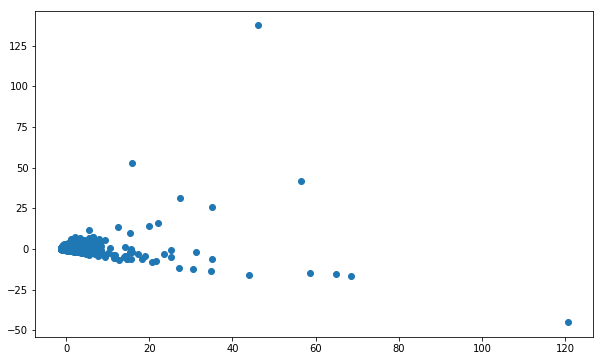

In [12]:
ns1.pmi_plot.show(annotate=False)

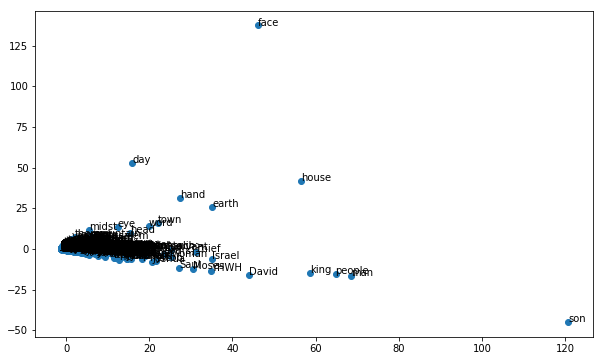

In [14]:
ns1.pmi_plot.show()

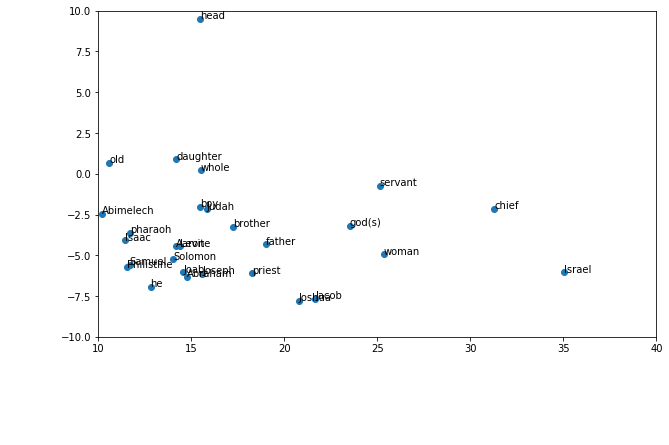

In [15]:
ns1.pmi_plot.show(axis=[10, 40, -10, 10])

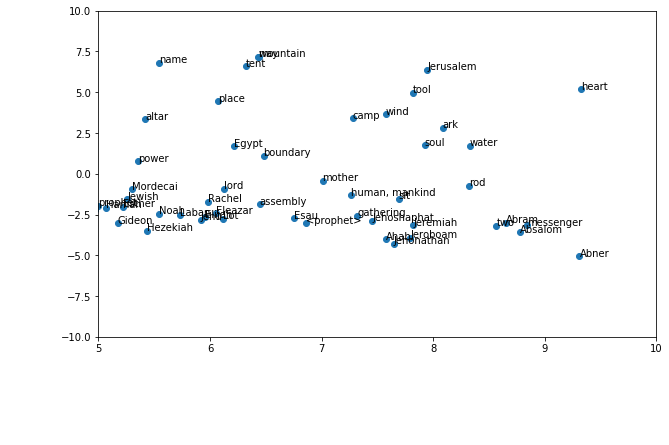

In [16]:
ns1.pmi_plot.show(axis=[5, 10, -10, 10])

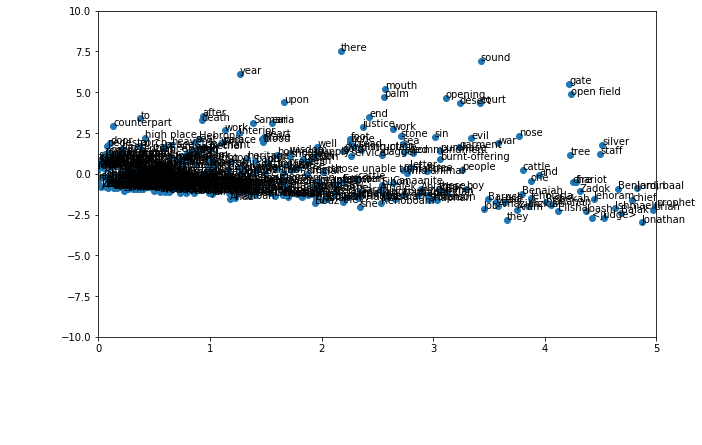

In [17]:
ns1.pmi_plot.show(axis=[0, 5, -10, 10])

In [18]:
ns1.similarity_pmi['<BD/ (servant)'].sort_values(ascending=False).head(20)

<BD/ (servant)         1.000000
CPXH/ (maidservant)    0.182032
FR/ (chief)            0.176718
JWXNN/ (Johanan)       0.168978
N<R/ (boy)             0.158466
DWD==/ (David)         0.157444
XMWR=/ (Hamor)         0.156385
<M/ (people)           0.156054
J<QB/ (Jacob)          0.149922
MCH=/ (Moses)          0.149239
C>WL=/ (Saul)          0.144157
CKM==/ (Shechem)       0.143165
>DNJHW/ (Adonijah)     0.142937
>CH/ (woman)           0.142101
>JC/ (man)             0.139351
MJKJHW/ (<prophet>)    0.134317
JWNTN/ (Jonathan)      0.134039
LWV=/ (Lot)            0.133842
JW>B/ (Joab)           0.133606
>BCLWM/ (Absalom)      0.131158
Name: <BD/ (servant), dtype: float64

In [19]:
ns1.similarity_pmi['GML/ (camel)'].sort_values(ascending=False).head(20)

GML/ (camel)                 1.000000
MR</ (friend)                0.192802
SWS/ (horse)                 0.184124
Y>N/ (cattle)                0.173178
XMWR/ (he-ass)               0.155111
JRX</ (Jarha)                0.149802
XSJL/ (cockroach)            0.149802
XJRM/ (Hiram)                0.136110
XLB/ (milk)                  0.127932
NZJR/ (singled out)          0.126593
MSPW>/ (fodder)              0.123648
MXJH/ (life preservation)    0.123648
MSWH/ (mask)                 0.123648
JRCH/ (possession)           0.123648
MKS/ (tax)                   0.123648
MGR<WT/ (recesses)           0.123648
M<FR/ (tenth)                0.123648
MZWN/ (food)                 0.123648
CKBT/ (copulation)           0.123648
NJR=/ (lamp)                 0.123648
Name: GML/ (camel), dtype: float64

In [20]:
ns1.similarity_pmi['JHWH/ (YHWH)'].sort_values(ascending=False).head(20)

JHWH/ (YHWH)            1.000000
>LHJM/ (god(s))         0.281660
MCH=/ (Moses)           0.173089
DWD==/ (David)          0.165871
MLK/ (king)             0.148219
C>WL=/ (Saul)           0.141127
JHWC</ (Joshua)         0.134322
JHWNTN/ (Jehonathan)    0.130753
JHWJD</ (Jehoiada)      0.128308
JWSP/ (Joseph)          0.125507
PR<H/ (pharaoh)         0.124203
>BRHM/ (Abraham)        0.116141
J<QB/ (Jacob)           0.113479
PL>[ (be miraculous)    0.111845
NX/ (Noah)              0.108979
ML>K/ (messenger)       0.107764
CLMH=/ (Solomon)        0.105435
>JC/ (man)              0.105174
JYXQ/ (Isaac)           0.104453
JW>B/ (Joab)            0.098945
Name: JHWH/ (YHWH), dtype: float64

In [21]:
ns1.similarity_pmi['LXM/ (bread)'].sort_values(ascending=False).head(20)

LXM/ (bread)                 1.000000
MSTR=/ (making hide face)    0.137264
YMWQJM/ (cakes)              0.131911
TXNWN/ (supplication)        0.126023
BJNH/ (understanding)        0.126023
KN==/ (gnat)                 0.109865
QLH[ (roast)                 0.105396
JSDWT/ (foundation)          0.105396
FQ/ (sack)                   0.104579
KWMZ/ (breastplate)          0.100245
MVWH/ (yarn)                 0.100245
KRML=/ (new corn)            0.100245
CDD[ (despoil)               0.100245
XCQ/ (desire)                0.098645
GW/ (back)                   0.094440
B<L_BRJT/ (Baal-Berith)      0.094440
KBWDH/ (what is valuable)    0.094440
YNJP/ (turban)               0.094440
M>PL/ (darkness)             0.094440
MC<NT/ (support)             0.094440
Name: LXM/ (bread), dtype: float64

In [22]:
ns1.similarity_pmi['MJM/ (water)'].sort_values(ascending=False).head(20)

MJM/ (water)            1.000000
GCM/ (rain)             0.160729
NZL[ (flow)             0.125851
NQJWN/ (innocence)      0.116296
T<LH/ (channel)         0.111046
YJR===/ (convulsion)    0.110011
GBRT/ (lady)            0.106813
SR<PH/ (bough)          0.104228
GDRWT/ (Gederoth)       0.104055
PLYWT/ (shuddering)     0.101482
JJN/ (wine)             0.101455
NBLH=/ (corpse)         0.100706
>LJL/ (god)             0.100310
KD/ (pitcher)           0.099766
DRBN/ (point)           0.099239
JWYR/ (potter)          0.097342
CKR=/ (strong drink)    0.097342
RJR/ (spittle)          0.096493
HWD/ (splendour)        0.095195
BFM/ (balsam-tree)      0.094684
Name: MJM/ (water), dtype: float64

How is "convulsion" similar to water?

In [23]:
ns1.raw['YJR===/'][ns1.raw['YJR===/'] > 0]

Subj.Pred.HPK[.nif    1.0
Name: YJR===/, dtype: float64

In [24]:
ns1.raw['MJM/']['Subj.Pred.HPK[.nif']

1.0

Both nouns share the attribute of being able to "be poured out." 

Looking at this noun's uses as described by BDB, it seems that this noun shares another surprising commonality with מים, that is, a person can be filled (מלא) with חלחלה צירים, that is, "anguish of pangs." Thus, in a surprising way this noun may be a good match.  

In [25]:
ns1.similarity_pmi['MLK/ (king)'].sort_values(ascending=False).head(20)

MLK/ (king)              1.000000
C>WL=/ (Saul)            0.221667
DWD==/ (David)           0.196091
FR/ (chief)              0.186003
>B/ (father)             0.177841
<M/ (people)             0.174665
CLMH=/ (Solomon)         0.171621
>BNR/ (Abner)            0.159549
JRB<M/ (Jeroboam)        0.153733
>JC/ (man)               0.153181
>X>B/ (Ahab)             0.151361
MCH=/ (Moses)            0.150077
PR<H/ (pharaoh)          0.149194
JHWH/ (YHWH)             0.148219
J<QB/ (Jacob)            0.146471
CMW>L/ (Samuel)          0.146320
BN/ (son)                0.145640
JHWC</ (Joshua)          0.144838
JFR>L/ (Israel)          0.143220
JHWCPV/ (Jehoshaphat)    0.137409
Name: MLK/ (king), dtype: float64

In [26]:
ns1.similarity_pmi['<JR/ (town)'].sort_values(ascending=False).head(20)

<JR/ (town)             1.000000
CMRWN/ (Samaria)        0.171131
>RY/ (earth)            0.170553
JRWCLM/ (Jerusalem)     0.152916
BJT/ (house)            0.133778
RMH==/ (Ramah)          0.126269
BJT_LXM/ (Bethlehem)    0.124825
GBWL/ (boundary)        0.122105
BJT_>L/ (Bethel)        0.118441
<J=/ (Ai)               0.118039
JRDN/ (Jordan)          0.114887
>JLWN==/ (Aijalon)      0.112651
MXNH/ (camp)            0.111259
>BN_H<ZR/ (Ebenezer)    0.110797
XBWR/ (Habor)           0.108790
JBJC=/ (Jabesh)         0.108372
XBRWN=/ (Hebron)        0.108243
Y<R/ (Zoar)             0.103795
PQJD/ (officer)         0.103242
>CDWD/ (Ashdod)         0.102800
Name: <JR/ (town), dtype: float64

In [27]:
ns1.similarity_pmi['JWM/ (day)'].sort_values(ascending=False).head(20)

JWM/ (day)               1.000000
CNH/ (year)              0.167421
LJLH/ (night)            0.146535
XDC=/ (month)            0.111577
YHRJM/ (noon)            0.102545
<T/ (time)               0.101830
BQR=/ (morning)          0.097238
MWT/ (death)             0.059357
>Z (then)                0.052760
<FWR/ (a ten)            0.050168
SR<PH/ (bough)           0.050168
<YM/ (bone)              0.050047
MHWMH/ (discomfiture)    0.048847
<RB/ (evening)           0.047971
MWSK/ (<uncertain>)      0.047742
RCJWN/ (permission)      0.047468
MXRT/ (next day)         0.047188
RWX/ (wind)              0.046622
CLC/ (three)             0.046506
>XRJT/ (end)             0.045917
Name: JWM/ (day), dtype: float64

In [28]:
ns1.raw['JWM/'][ns1.raw['JWM/'] > 0].sort_values(ascending=False).head(10)

Time.Pred.<FH[.qal       17.0
.par.LJLH/               15.0
Time.Pred.JCB[.qal       14.0
Time_B.Pred.BW>[.qal     13.0
Time_<D.Pred.QR>[.qal     9.0
Time_<D.Pred.JCB[.qal     9.0
Time_B.Pred.>MR[.qal      7.0
Time_B.Pred.<FH[.qal      6.0
.rec.MWT/                 6.0
.rec.CLMH=/               5.0
Name: JWM/, dtype: float64

While יום performs quite well, it should be noted that this has much to do with the specialized "Time" phrase function type in the BHSA dataset.

In [29]:
ns1.similarity_pmi['VWB/ (good)'].sort_values(ascending=False).head(20)

VWB/ (good)               1.000000
HWH==/ (destruction)      0.256743
MJVB/ (best)              0.234313
MWSB/ (<uncertain>)       0.219915
KR/ (ram)                 0.214663
MPJBCT/ (Mephibosheth)    0.210542
MCL/ (proverb)            0.194881
M>WMH/ (something)        0.187977
QCH/ (hard)               0.180160
>RZ/ (cedar)              0.177582
PJMH/ (fat)               0.172098
N>YH=/ (contumely)        0.172098
NBLH/ (stupidity)         0.172098
<YRT/ (assembly)          0.172098
FPM/ (moustache)          0.172098
CPWV/ (judgment)          0.172098
<NP/ (branches)           0.172098
NRGL/ (Nergal)            0.172098
BWY/ (byssus cloth)       0.172098
CPV/ (judgment)           0.172098
Name: VWB/ (good), dtype: float64

In [30]:
ns1.similarity_pmi['>DMH/ (soil)'].sort_values(ascending=False).head(20)

>DMH/ (soil)                        1.000000
JLDH/ (girl)                        0.294219
MXYB/ (hewn stone)                  0.265757
YJD=/ (provision)                   0.242358
QNT/ (Kenath)                       0.220410
CW<L/ (fox)                         0.220410
GMZW/ (Gimzo)                       0.220410
MLKJ_YDQ/ (Melchizedek)             0.207774
KWRC/ (Cyrus)                       0.207774
BKRH/ (right of first-born)         0.185512
GDRWT/ (Gederoth)                   0.171008
PQJD/ (officer)                     0.154687
>CQLWN/ (Ashkelon)                  0.149767
PCXWR/ (Pashhur)                    0.144354
MNXM/ (Menahem)                     0.142932
>ZWR/ (loin-cloth)                  0.133583
CRT[ (serve)                        0.127563
>JLWN==/ (Aijalon)                  0.114773
KWCN_RC<TJM/ (Cushan-Rishathaim)    0.112680
XYWR/ (Hazor)                       0.104832
Name: >DMH/ (soil), dtype: float64

What does "soil" and "girl" have to do with each other?

In [31]:
ns1.raw['JLDH/'][ns1.raw['JLDH/'] > 0]

Objc.Pred.MKR[.qal    1.0
Name: JLDH/, dtype: float64

In [32]:
ns1.raw['>DMH/'][ns1.raw['>DMH/'] > 0]

.rec.JFR>L/              1.0
.rec.KHN/                2.0
.rec.MYRJM/              2.0
Adju_>L.Pred.FMX[.qal    1.0
Cmpl_MN.Pred.JYR[.qal    1.0
Cmpl_MN.Pred.YMX[.hif    1.0
Loca_<L.Pred.FJM[.qal    1.0
Objc.Pred.<BD[.qal       1.0
Objc.Pred.LKD[.qal       1.0
Objc.Pred.MKR[.qal       1.0
Objc.Pred.QNH[.qal       2.0
Subj.Pred.BQ<[.nif       1.0
Subj.Pred.JY>[.hif       1.0
Name: >DMH/, dtype: float64

Both of these items are sold!

In [33]:
ns1.similarity_pmi['KHN/ (priest)'].sort_values(ascending=False).head(20)

KHN/ (priest)           1.000000
LWJ/ (Levite)           0.432293
JW>B/ (Joab)            0.184616
J<QB/ (Jacob)           0.169837
MCH=/ (Moses)           0.169666
JWNTN/ (Jonathan)       0.166446
XMWR=/ (Hamor)          0.161684
>LJC</ (Elisha)         0.157919
TWDH/ (thanksgiving)    0.155268
>BRM/ (Abram)           0.154023
SRNJM/ (lords)          0.153907
DWD==/ (David)          0.153425
>WRJH/ (Uriah)          0.151508
>HLJ>B/ (Oholiab)       0.150633
BYL>L/ (Bezalel)        0.150392
CM<J=/ (Shimei)         0.150090
>XJHW/ (Ahijah)         0.146265
TWL<=/ (Tola)           0.146229
CM<JH/ (Shemaiah)       0.145557
C>WL=/ (Saul)           0.141901
Name: KHN/ (priest), dtype: float64

In [34]:
ns1.similarity_pmi['TWDH/ (thanksgiving)'].sort_values(ascending=False).head(20)

TWDH/ (thanksgiving)    1.000000
>XR=/ (other)           0.614103
MTTJH/ (Mattithiah)     0.587035
<NJH/ (Anaiah)          0.587035
KWMZ/ (breastplate)     0.527511
CDD[ (despoil)          0.527511
KRML=/ (new corn)       0.527511
MVWH/ (yarn)            0.527511
JXZJH/ (Jahzeiah)       0.492550
HJMN/ (Heman)           0.432638
CM<===/ (Shema)         0.408426
JTR[ (remain)           0.403388
QDMJ>L/ (Kadmiel)       0.399441
MN<WL/ (lock)           0.376225
M<FJH/ (Maaseiah)       0.354543
RB_CQH/ (rabshake)      0.330060
XRBH=/ (ruin)           0.317603
NDBH/ (free will)       0.292360
<RLH/ (foreskin)        0.288191
QRBN/ (offering)        0.263933
Name: TWDH/ (thanksgiving), dtype: float64

What is going on with this noun?

In [35]:
ns1.raw['TWDH/'][ns1.raw['TWDH/'] > 0]

Objc.Pred.<MD[.hif    1.0
Objc.Pred.BW>[.hif    1.0
Subj.Pred.<MD[.qal    1.0
Name: TWDH/, dtype: float64

In [36]:
ns1.raw['>XR=/'][ns1.raw['>XR=/'] > 0]

Objc.Pred.<MD[.hif    1.0
Name: >XR=/, dtype: float64

In [37]:
ns1.raw['MTTJH/'][ns1.raw['MTTJH/'] > 0]

Subj.Pred.<MD[.qal    1.0
Name: MTTJH/, dtype: float64

In [38]:
ns1.raw['KWMZ/'][ns1.raw['KWMZ/'] > 0]

Objc.Pred.BW>[.hif    1.0
Name: KWMZ/, dtype: float64

Thanksgiving can be "set up" עמד and "brought in" בוא, as with the other nouns.

In [39]:
ns1.similarity_pmi['CJR/ (song)'].sort_values(ascending=False).head(20)

CJR/ (song)                  1.000000
NBL==/ (harp)                0.397625
NGP/ (plague)                0.381085
PRY[ (break)                 0.381085
MS<D/ (<uncertain>)          0.378773
KNWR/ (cither)               0.368496
TP/ (tambourine)             0.279085
BFRH/ (report)               0.224476
MXJH/ (life preservation)    0.224476
MKS/ (tax)                   0.224476
VRP==/ (food)                0.224476
JRCH/ (possession)           0.224476
C>LH/ (request)              0.224476
MGR<WT/ (recesses)           0.224476
TPLH=/ (unseemliness)        0.224476
BYR=/ (<place of refuge>)    0.224476
TMNT_SRX/ (Timnath Serah)    0.224476
HRJWN/ (conception)          0.224476
NQMH/ (vengeance)            0.224476
M<FR/ (tenth)                0.224476
Name: CJR/ (song), dtype: float64

In what way is שיר "song" similar to נקף "plague"?

In [40]:
ns1.raw['CJR/'][ns1.raw['CJR/'] > 0]

.par.KNWR/               1.0
.par.TP/                 1.0
.par.XYYRH/              1.0
.rec.JHWH/               1.0
Adju_B.Pred.CLX[.piel    1.0
Objc.Pred.NTN[.qal       1.0
Subj.Pred.XLL[.hif       1.0
Name: CJR/, dtype: float64

In [41]:
ns1.raw['NGP/'][ns1.raw['NGP/'] > 0]

Subj.Pred.XLL[.hif    1.0
Name: NGP/, dtype: float64

In [42]:
ns1.raw['PRY['][ns1.raw['PRY['] > 0]

Subj.Pred.XLL[.hif    1.0
Name: PRY[, dtype: float64

These appear to due to this verb's polysemy, senses of both "play pipe" and "begin."

In [43]:
ns1.similarity_pmi['>KL/ (food)'].sort_values(ascending=False).head(20)

>KL/ (food)                  1.000000
MD</ (knowledge)             0.470952
TQWPH/ (turning point)       0.276580
YMX/ (sprout)                0.259174
BR/ (grain)                  0.252783
PQ<T/ (gourd)                0.242132
MKS/ (tax)                   0.235259
M<FR/ (tenth)                0.235259
TPLH=/ (unseemliness)        0.235259
BQCH/ (request)              0.235259
BYR=/ (<place of refuge>)    0.235259
TMNT_SRX/ (Timnath Serah)    0.235259
QHLH/ (assembly)             0.235259
BFRH/ (report)               0.235259
MGR<WT/ (recesses)           0.235259
HRJWN/ (conception)          0.235259
JGB/ (compulsory labour)     0.235259
MXJH/ (life preservation)    0.235259
NJR=/ (lamp)                 0.235259
NQMH/ (vengeance)            0.235259
Name: >KL/ (food), dtype: float64

In [44]:
ns1.raw['>KL/'][ns1.raw['>KL/'] > 0]

.rec.CNH/              1.0
.rec.FDH/              1.0
Objc.Pred.C>L[.qal     1.0
Objc.Pred.CBR=[.qal    1.0
Objc.Pred.LQX[.qal     1.0
Objc.Pred.NTN[.qal     2.0
Objc.Pred.QBY[.qal     1.0
Name: >KL/, dtype: float64

In [45]:
ns1.raw['MD</'][ns1.raw['MD</'] > 0]

Objc.Pred.C>L[.qal    1.0
Objc.Pred.NTN[.qal    1.0
Name: MD</, dtype: float64

Both "food" and "knowlege" are requested (שאל) and given (נתן).

In [46]:
ns1.similarity_pmi['>MRH/ (word)'].sort_values(ascending=False).head(20)

>MRH/ (word)            1.000000
<DWT/ (reminder)        0.194754
XSD/ (loyalty)          0.166548
MCMRT/ (guard-post)     0.159192
XQH/ (regulation)       0.156788
BRJT/ (covenant)        0.148635
ML>KWT/ (commission)    0.137975
TWRH/ (instruction)     0.120277
MYWH/ (commandment)     0.119800
MXCBH/ (thought)        0.112078
TRDMH/ (sleep)          0.111108
QYP/ (anger)            0.109940
QRBN/ (offering)        0.106098
MCPV/ (justice)         0.090711
>RWN/ (ark)             0.085601
XMLH/ (compassion)      0.085156
JR>/ (afraid)           0.084962
BRKH/ (blessing)        0.069542
PXD/ (trembling)        0.067804
CBW<H/ (oath)           0.064923
Name: >MRH/ (word), dtype: float64

## Evaluation and Export

Some nouns perform quite well in terms of semantic similarity. Others reflect share only a small set of attributes that happen to be instantiated in the corpus, such as "give"-ability and "lift"-ability. Nevertheless, some very positive, strong tendencies can be seen in the data. The most relevant tendency is that personal nouns tend to have other personal nouns in their top similar terms; non-personal nouns likewise relate most to non-personal nouns. This particular quality will be especially important for clustering verbs into classes.

The noun space is successful for the purpose of enhancing the verb space. The pre-computed data has been made available in `data/ns1_pmi.pickle` and can be reloaded into the semantic space in the verb-space enhancement notebook.